In [143]:
#Import necessary libraries
import pandas as pd
import os
import requests
import numpy as np
import requests
from pprint import pprint
import json
import gmaps
import matplotlib.pyplot as plt
import numpy as np

# Import API key
from api_keys import g_key

import datetime
from scipy.stats import linregress

In [144]:
# import clean_country_data.csv from file
filename = os.path.join("clean_data_files","clean_data_by_country.csv")
country_data  = pd.read_csv(filename)
del country_data["Unnamed: 0"]
del country_data["JH Confirmed"]
del country_data["JH Recovered"]
country_data.head()

,Country Name,Country Code,2018 GDP USD,JH Deaths,Area (mi2),Population,Population Density (mi2),Lat,Lng
0,Afghanistan,AFG,1.948438e+10,1436.0,249347.0,31.575018,127.0,33.836449,66.008762
1,Albania,ALB,1.514702e+10,347.0,11082.0,2.862427,258.0,41.142382,20.053634
2,Algeria,DZA,1.740000e+11,1654.0,919595.0,43.000000,47.0,28.148952,2.653180
3,Andorra,AND,3.218316e+09,53.0,179.0,0.076177,425.0,42.542353,1.561301
4,Angola,AGO,1.010000e+11,144.0,481354.0,29.250009,61.0,-12.292289,17.536979


In [145]:
# Formatting and renaming
country_data["JH Deaths (K)"] = country_data["JH Deaths"]/1000
country_data["% Total Deaths"] = (country_data["JH Deaths"]/country_data["JH Deaths"].sum())*100
country_data["2018 GDP (100T)"] = country_data["2018 GDP USD"]/100000000000
country_data["2018 GDP(M)"] = country_data["2018 GDP USD"]/1000000
country_data["2018 GDP(T)"] = country_data["2018 GDP USD"]/1000000000
country_data.rename(columns={"Population": "Population (M)"}, inplace=True)
country_data.describe()

,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
count,1.730000e+02,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000
mean,4.852408e+11,6483.676301,2.866351e+05,42.718178,808.881156,20.100222,16.440287,6.483676,0.578035,4.852408,4.852408e+05,485.240850
std,1.968353e+12,24266.639495,7.818937e+05,152.880602,4048.822139,24.484442,57.841837,24.266639,2.163427,19.683529,1.968353e+06,1968.352944
min,4.222959e+08,0.000000,7.800000e-01,0.034641,5.400000,-41.829454,-112.494334,0.000000,0.000000,0.004223,4.222959e+02,0.422296
25%,1.262885e+10,46.000000,1.108200e+04,2.413643,93.000000,4.516800,-8.396407,0.046000,0.004101,0.126289,1.262885e+04,12.628855
50%,4.223130e+10,224.000000,5.525100e+04,9.397800,211.000000,18.155195,19.394358,0.224000,0.019970,0.422313,4.223130e+04,42.231296
75%,2.450000e+11,1654.000000,2.100260e+05,30.280811,520.000000,41.461831,43.744674,1.654000,0.147458,2.450000,2.450000e+05,245.000000
max,2.050000e+13,223264.000000,6.612093e+06,1404.484040,49107.000000,68.795828,171.462581,223.264000,19.904500,205.000000,2.050000e+07,20500.000000


In [171]:
#Create gmap visualization of COVID deaths by country
# access maps with unique API key
gmaps.configure(api_key=g_key)
locations = country_data[["Lat","Lng"]]
JH_deaths = country_data["JH Deaths"]
GDP = country_data["2018 GDP(T)"]
# create intial gmap figure
fig = gmaps.figure()
# add heatmap layer
death_layer = gmaps.heatmap_layer(locations, weights=JH_deaths, dissipating=False, max_intensity=500, point_radius=0.9)
GDP_layer = gmaps.heatmap_layer(locations, weights=GDP, dissipating=True, max_intensity=1000, point_radius=15)
#GDP_layer.gradient = ['white','silver','black']
# add heatmap layer to figure
fig.add_layer(death_layer)
fig.add_layer(GDP_layer)
# Display the figure
fig

Figure(layout=FigureLayout(height='420px'))

r = 0.3632867247937965


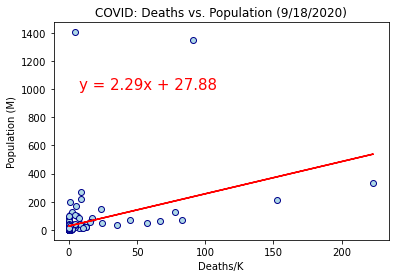

In [174]:
# Deaths vs Population
x_data = country_data["JH Deaths (K)"]
y_data = country_data["Population (M)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"COVID: Deaths vs. Population ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("Population (M)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 1000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig1 = os.path.join("charts","Deaths vs Population - scatter.png")
plt.savefig(output_path_fig1)

r = -0.032136045735543385


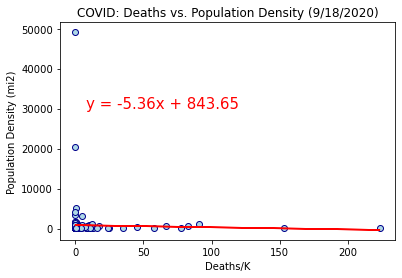

In [176]:
# Deaths vs Population Density
x_data = country_data["JH Deaths (K)"]
y_data = country_data["Population Density (mi2)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"COVID: Deaths vs. Population Density ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("Population Density (mi2)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig2 = os.path.join("charts","Deaths vs Population Density - scatter.png")
plt.savefig(output_path_fig2)

r = 0.6746545156223035


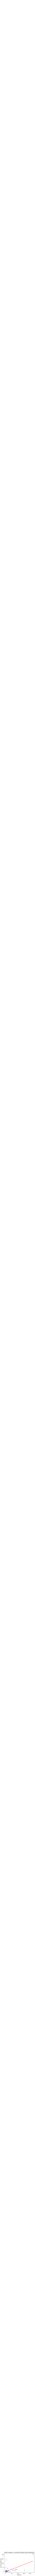

In [177]:
# Deaths vs Population Density
x_data = country_data["JH Deaths (K)"]
y_data = country_data["2018 GDP (100T)"]
plt.scatter(x=x_data, y=y_data, marker="o",facecolors="lightblue",edgecolors="darkblue")
today = pd.to_datetime('today')
plt.title(f"COVID: Deaths vs. 2018 GDP (Trillions USD) ({today.month}/{today.day}/{today.year})")
plt.xlabel("Deaths/K")
plt.ylabel("2018 GDP ($MM USD)")
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_data, y_data)
# Calculate the predictions for each value of x (# Rooms)
regression_values = x_data * slope + intercept
# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_data, regression_values, "red")
# add line equation to plot
plt.annotate(line_eq, (7.5, 30000), fontsize=15, color="red")
# add pearson's r value to plot 
print(f"r = {rvalue}")
# output plot to file
output_path_fig3 = os.path.join("charts","Deaths vs GDP - scatter.png")
plt.savefig(output_path_fig3)

In [154]:
# % of Total deaths by Country
country_data_death_sort = country_data.sort_values(by=["% Total Deaths"], ascending=False)
country_death_top_20 = country_data_death_sort.head(20)
country_death_top_20 .describe()

,2018 GDP USD,JH Deaths,Area (mi2),Population (M),Population Density (mi2),Lat,Lng,JH Deaths (K),% Total Deaths,2018 GDP (100T),2018 GDP(M),2018 GDP(T)
count,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000
mean,2.334100e+12,49561.300000,1.170819e+06,139.431449,325.350000,24.612254,-24.400610,49.561300,4.418504,23.341000,2.334100e+06,2334.100000
std,4.409902e+12,55660.257624,1.786573e+06,296.083265,368.660345,34.337159,59.422371,55.660258,4.962240,44.099024,4.409902e+06,4409.902409
min,1.080000e+11,9249.000000,1.184900e+04,10.343403,10.000000,-37.734626,-112.494334,9.249000,0.824570,1.080000,1.080000e+05,108.000000
25%,4.820000e+11,12456.750000,1.325112e+05,28.514380,63.750000,-3.358371,-73.407285,12.456750,1.110548,4.820000,4.820000e+05,482.000000
50%,1.320000e+12,24078.500000,3.663805e+05,52.854827,144.500000,41.204731,-3.269104,24.078500,2.146654,13.200000,1.320000e+06,1320.000000
75%,2.245000e+12,69534.250000,1.122443e+06,94.006398,539.250000,51.347809,10.804380,69.534250,6.199139,22.450000,2.245000e+06,2245.000000
max,2.050000e+13,223264.000000,6.612093e+06,1352.642280,1092.000000,62.777378,96.693456,223.264000,19.904500,205.000000,2.050000e+07,20500.000000


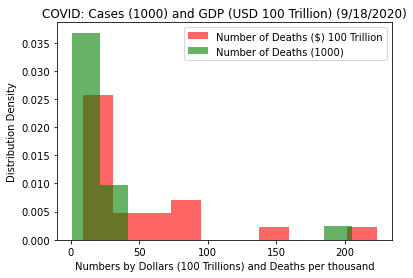

In [178]:
# Create histogram of top 20 % of death
deaths_top_20 = country_death_top_20["JH Deaths (K)"]
gdp_top_20 = country_death_top_20["2018 GDP (100T)"]
plt.hist(deaths_top_20, density=True, color='red', alpha=0.6, label="Number of Deaths ($) 100 Trillion")
plt.hist(gdp_top_20, density=True, color='green', alpha=0.6, label="Number of Deaths (1000)")
plt.ylabel("Distribution Density")
plt.xlabel("Numbers by Dollars (100 Trillions) and Deaths per thousand")
plt.title(f"COVID: Cases (1000) and GDP (USD 100 Trillion) ({today.month}/{today.day}/{today.year})")
plt.legend()
output_path_fig4 = os.path.join("charts","Global Histogram.png")
plt.savefig(output_path_fig4)